In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [78]:
data=pd.read_csv(r"forestfires.csv")

In [79]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [80]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [81]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [82]:
for i in data.columns:
    print(i,':','\n',data[i].unique())

X : 
 [7 8 6 5 4 2 9 1 3]
Y : 
 [5 4 6 3 2 9 8]
month : 
 ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
day : 
 ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
FFMC : 
 [86.2 90.6 91.7 89.3 92.3 91.5 91.  92.5 92.8 63.5 90.9 92.9 93.3 84.9
 89.2 86.3 91.8 94.3 90.2 93.5 91.4 92.4 93.4 88.6 90.3 90.  88.1 79.5
 94.8 90.1 94.2 87.2 87.6 92.1 92.6 84.  86.6 93.  91.1 91.2 88.8 84.2
 89.7 83.9 69.  82.1 85.9 84.4 68.2 93.7 85.8 95.5 95.2 96.  85.6 81.5
 86.8 93.9 90.8 90.7 88.3 92.2 81.9 88.  83.  93.1 91.9 91.6 87.5 93.6
 84.6 85.4 84.7 86.9 85.2 90.4 53.4 85.1 89.6 50.4 88.2 92.  18.7 90.5
 84.1 85.  87.9 94.6 87.1 92.7 88.9 89.4 94.  75.1 91.3 93.2 94.9 95.
 95.1 95.8 95.9 96.2 96.1 94.5 81.6 94.4]
DMC : 
 [ 26.2  35.4  43.7  33.3  51.3  85.3  88.9 145.4 129.5  88.   73.2  70.8
 126.5 133.3 141.2  35.8  32.8  27.9  27.4  78.5  96.3 110.9 139.4 142.4
 117.9 149.3  85.1  91.8  69.7  75.6  80.7  41.5  25.7  60.6  96.9 108.3
  82.9  62.3  23.9  52.2 137.   99.6 111.2

In [83]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l=['month','day']
for i in l:
    data[i]=le.fit_transform(data[i])

In [84]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [85]:
data.shape

(517, 13)

In [86]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [87]:
data.describe(include='all')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


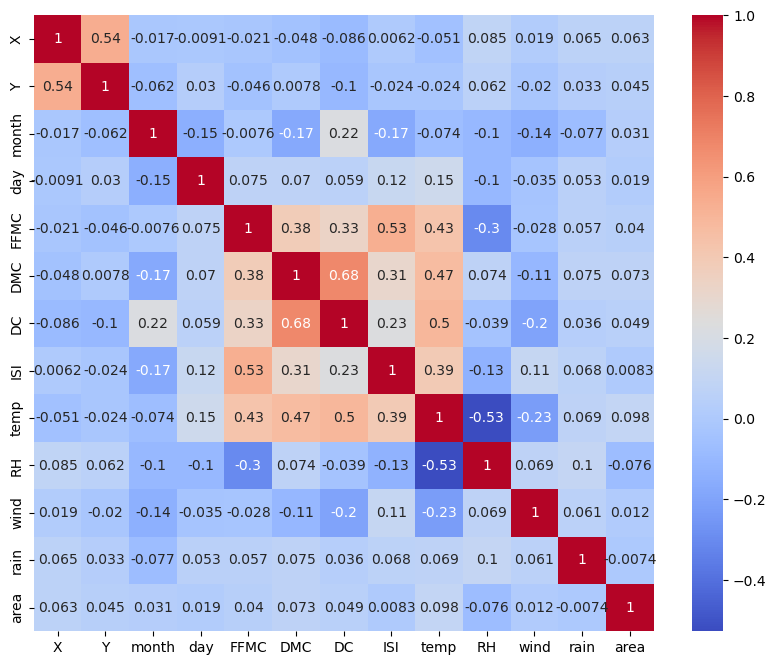

In [88]:

d = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(d, annot=True, cmap='coolwarm' )
plt.show()

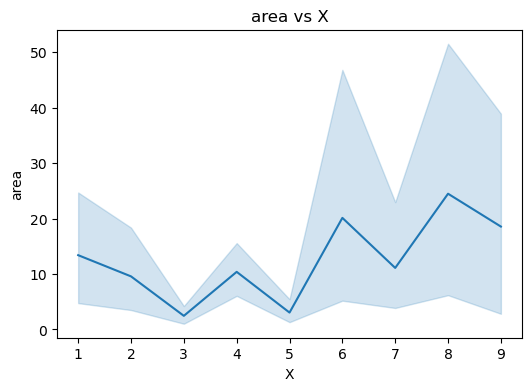

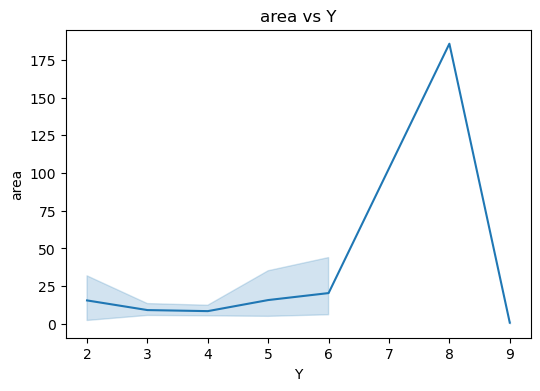

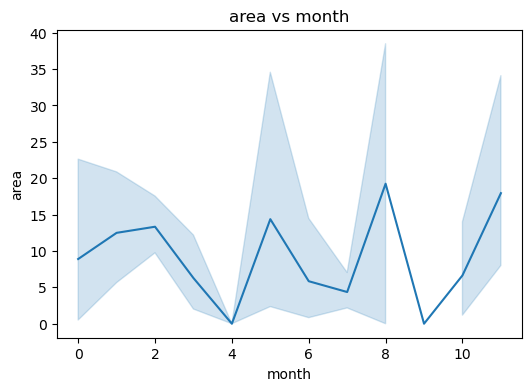

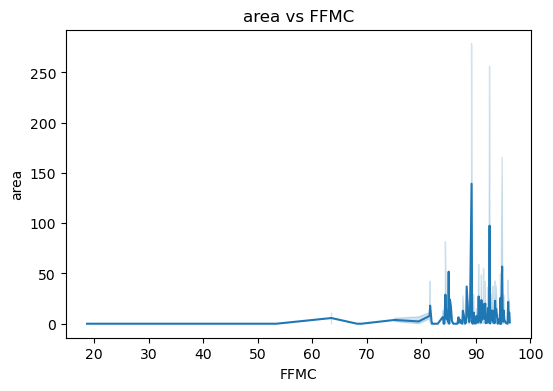

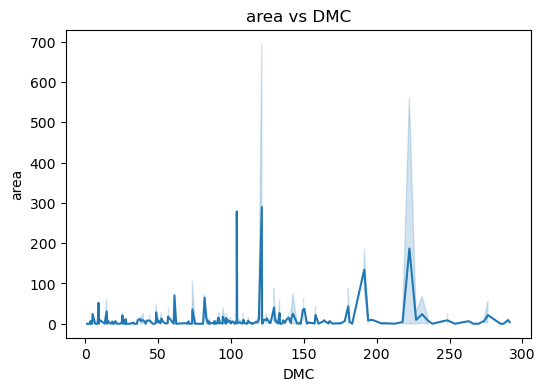

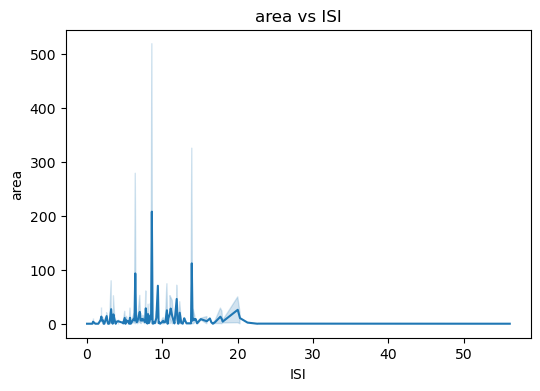

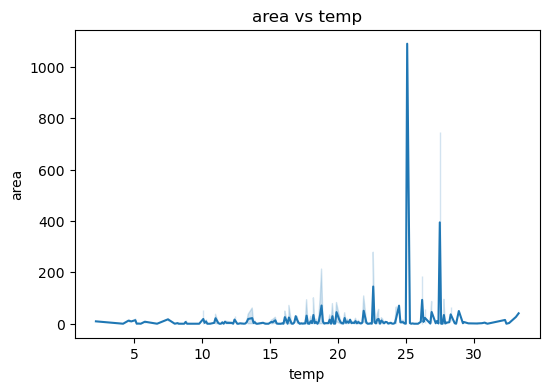

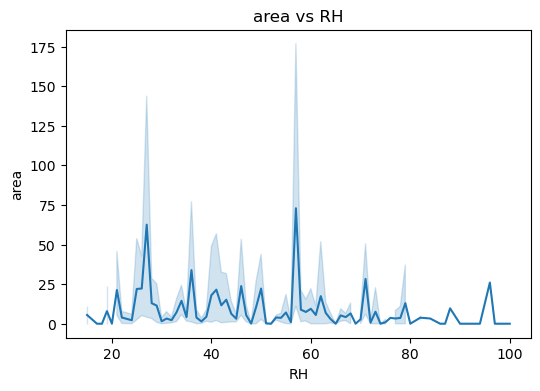

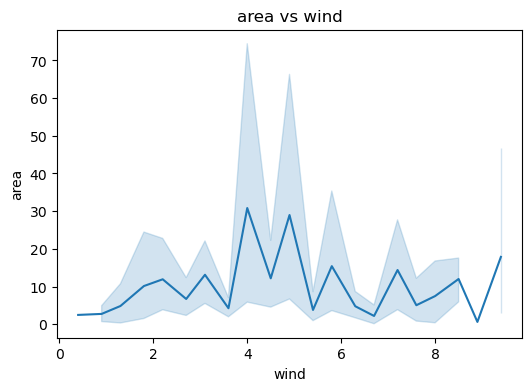

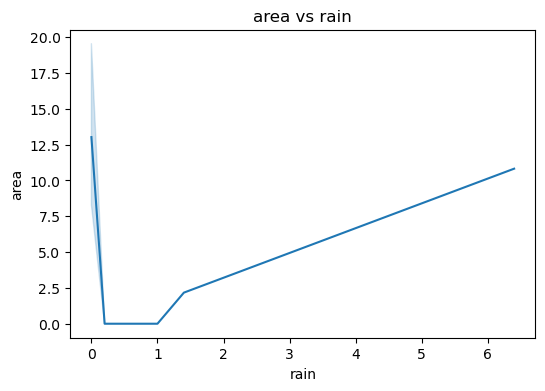

In [89]:
cols = ['X', 'Y', 'month', 'FFMC','DMC','ISI','temp','RH','wind','rain']
for col in cols:  
     plt.figure(figsize=(6,4))
     sns.lineplot(x=col, y='area', data=data)
     plt.title(f'area vs {col}')
     plt.xlabel(col)
     plt.ylabel('area')
     plt.show() 
          

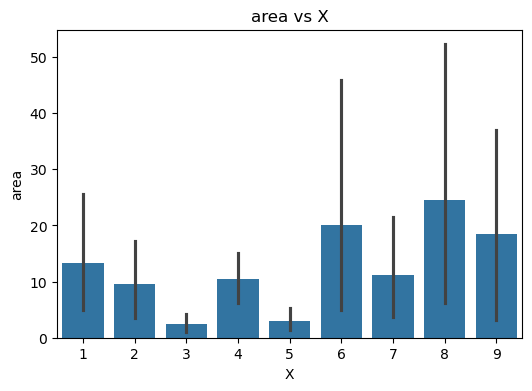

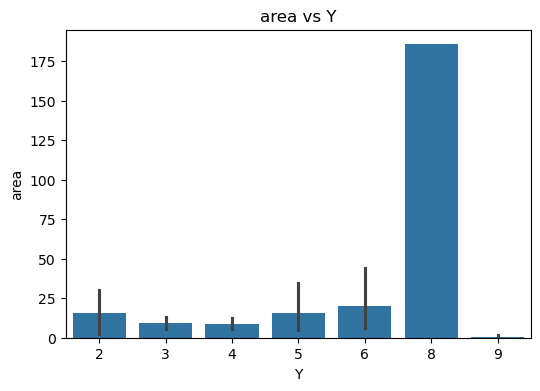

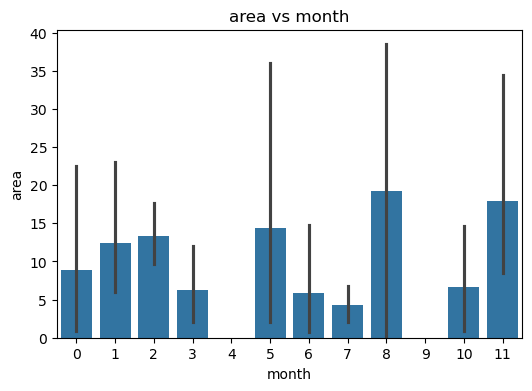

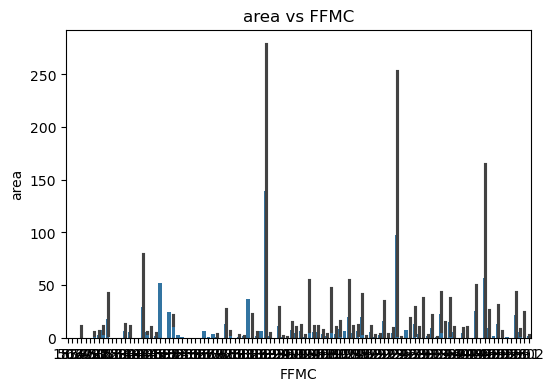

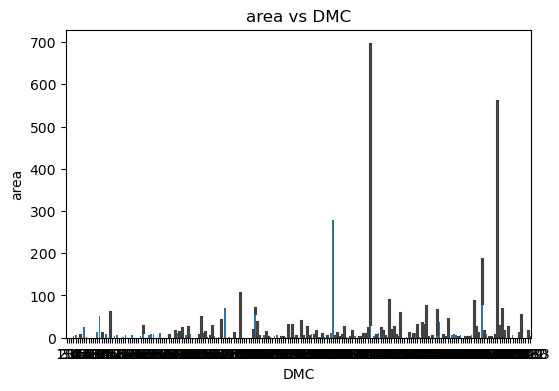

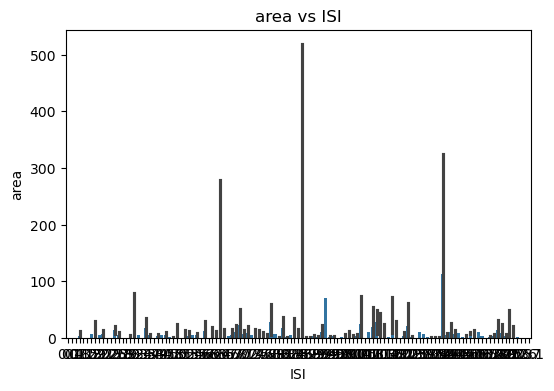

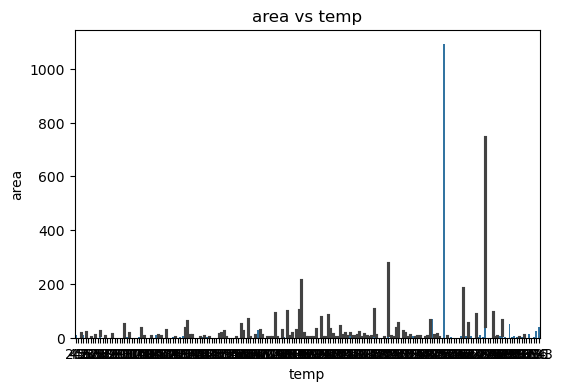

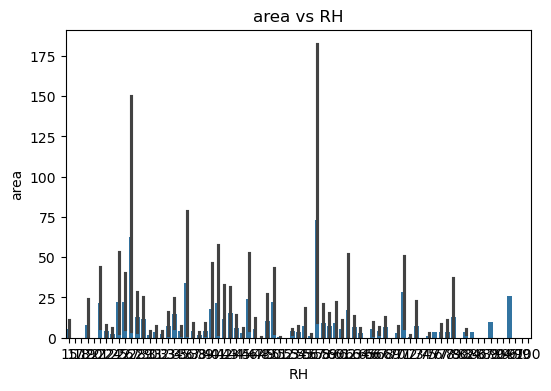

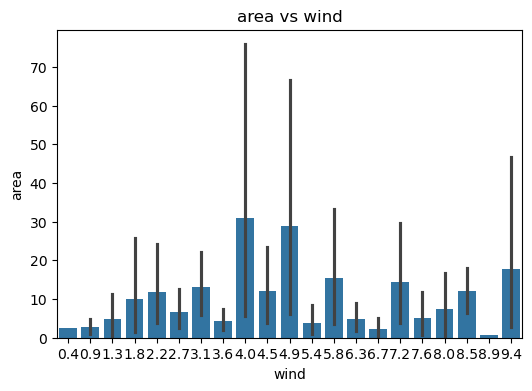

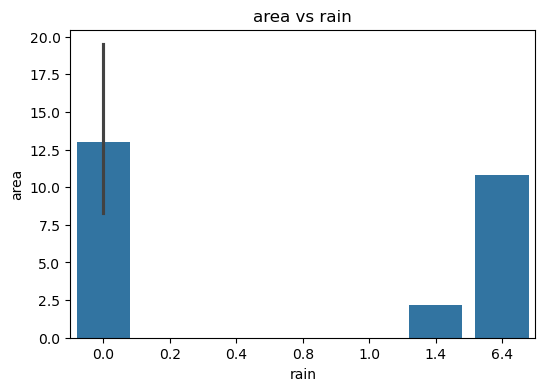

In [90]:
cols = ['X', 'Y', 'month', 'FFMC','DMC','ISI','temp','RH','wind','rain']
for col in cols:  
     plt.figure(figsize=(6,4))
     sns.barplot(x=col, y='area', data=data)
     plt.title(f'area vs {col}')
     plt.xlabel(col)
     plt.ylabel('area')
     plt.show() 
          

<Axes: xlabel='X', ylabel='area'>

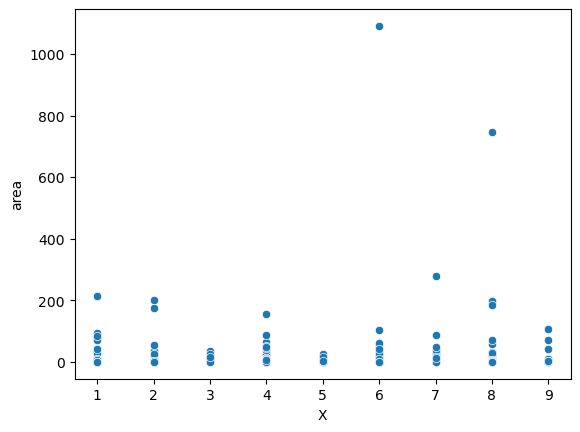

In [91]:
sns.scatterplot(x=data.X,y=data.area)

<Axes: xlabel='rain', ylabel='area'>

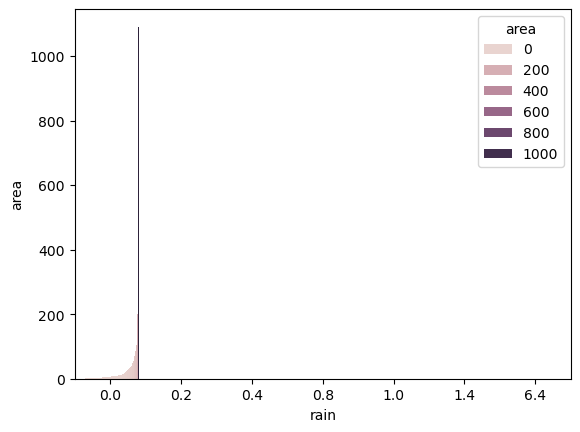

In [92]:
sns.barplot(x=data.rain,y=data.area,hue=data.area)

In [93]:
ip=data.drop(['area','month','day'],axis=1)

In [94]:
ip

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [95]:
op=data['area']

In [96]:
op

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [97]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.2)

In [98]:
#standard scalar transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [99]:
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg.fit(x_train,y_train)

LinearRegression()

In [100]:
yp=alg.predict(x_test)
yp

array([ 17.68230709,  33.01342888,  11.63901152,  13.88904433,
         7.79691742,  10.61136244,   0.62520042,  17.89890404,
        17.41325739,  -4.6146845 ,  33.42376449, -10.52743372,
        -2.60916886,  16.43543987,  36.2045139 ,  13.06921887,
        10.87984747,  15.74325337,  54.80312443,  20.50588022,
         4.58622728,   1.05222181,  12.1485792 ,  24.11134255,
        26.2834781 ,  17.39940267,  18.74471348,  26.82576829,
         6.36944297,  24.80132084, -19.93087955,   7.85756239,
        23.74570856,   6.5249719 ,   6.91925475,  -0.64014305,
        22.03072294,  15.87606106,  17.87488105,  18.02499126,
        26.28968751, -27.41983245,  19.46167811,   9.33358782,
        13.13295018,  20.12296895,  15.1015416 ,  17.51909306,
        13.99638568,  23.2313685 ,   4.42426954,  16.20724548,
         7.14587374,  17.23218721,  25.01718313,   4.45096179,
        13.84269967,  10.95760922,   4.60020476,   3.85974552,
         9.92070998,   5.41395904,   0.72268075,  12.22

In [101]:
df=pd.DataFrame({'y':list(y_test),'prediction':yp})

In [102]:

df


,y,prediction
0,154.88,17.682307
1,3.63,33.013429
2,0.00,11.639012
3,0.00,13.889044
4,6.10,7.796917
...,...,...
99,0.00,12.372230
100,0.00,5.813642
101,0.00,23.713596
102,2.75,45.326472


In [103]:
#accuracy
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,yp)
r2=r2_score(y_test,yp)

In [104]:
print(mse,r2)

1184.4321854907494 -0.09917141038889787


In [105]:
#polynomial
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(x_train)
pol_reg=LinearRegression()

pol_reg.fit(X_poly,y_train)
x1=poly.fit_transform(x_test)
yp2=pol_reg.predict(x1)


In [106]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
b2=mean_squared_error(y_test,yp2)
c2=r2_score(y_test,yp2)
print(b2,c2)



1851.8328742119572 -0.7185295849662481


In [107]:
#svm
from sklearn import svm
alg1=svm.SVR(kernel='rbf',C=500,gamma=0.01)
alg1.fit(x_train,y_train)
yp3=alg1.predict(x_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
bs=mean_squared_error(y_test,yp3)
cs=r2_score(y_test,yp3)
print(bs,cs)

1136.7349061944935 -0.05490759655640187


In [108]:
#decesion tree
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor(criterion="squared_error")
clf.fit(x_train,y_train)
yp4=clf.predict(x_test)
bd=mean_squared_error(y_test,yp4)
cd=r2_score(y_test,yp4)
print(bd,cd)

12343.810552884614 -10.455247350751353


In [109]:
#random forest tree
from sklearn.ensemble import RandomForestRegressor
clf1=RandomForestRegressor()
clf1.fit(x_train,y_train)
yp5=clf1.predict(x_test)
bf=mean_squared_error(y_test,yp5)
cf=r2_score(y_test,yp5)
print(bf,cf)

3686.2661611452536 -2.420912083485882


In [110]:
from sklearn.ensemble import AdaBoostRegressor
a2=AdaBoostRegressor(estimator=clf1)
a2.fit(x_train,y_train)
yp7=a2.predict(x_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
b2=mean_squared_error(y_test,yp7)
c2=r2_score(y_test,yp7)
print(b2,c2)

4973.348693111821 -3.615344605059449
